# Load the dataset

In [1]:
#import the libraries

import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# load the image data
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Exploratory Analysis

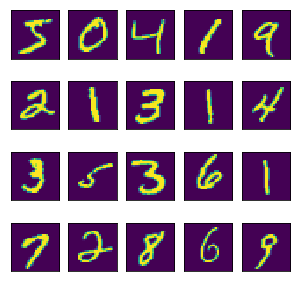

In [4]:
fig = plt.figure(figsize=(5,5))

for i in range(1,21):
    fig.add_subplot(4, 5, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i-1])
    
plt.show()

# Pre-process the data

In [5]:
# pre-process the data
num_classes = 10
input_size = 28*28

# flatten the images
x_test_copy = x_test.copy()
x_train = x_train.reshape(x_train.shape[0], input_size)
x_test = x_test.reshape(x_test.shape[0], input_size)

# convert the labels to one-hot-encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_test_copy.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)
(10000, 28, 28)


# Define the Neural Network Architecture

In [7]:
# define your neural network architecture

from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, activation='sigmoid', input_shape=(input_size,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=512)

Epoch 1/10
60000/60000 [==============================] - 2s 26us/step - loss: 1.8400 - acc: 0.6147
Epoch 2/10
60000/60000 [==============================] - 1s 24us/step - loss: 1.1356 - acc: 0.8142
Epoch 3/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.7461 - acc: 0.8567
Epoch 4/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.5636 - acc: 0.8731
Epoch 5/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.4615 - acc: 0.8882
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.4088 - acc: 0.8937
Epoch 7/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.3764 - acc: 0.8988
Epoch 8/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.3465 - acc: 0.9047
Epoch 9/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.3282 - acc: 0.9069
Epoch 10/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.3109 - acc: 0.9119

# Evaluate the model

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.304555861497
Test accuracy: 0.9111


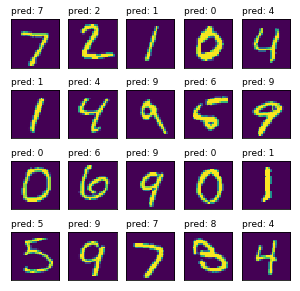

In [11]:
y_pred = model.predict_classes(x_test[0:20])

fig = plt.figure(figsize=(5,5))

for i in range(1,21):
    fig.add_subplot(4, 5, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_copy[i-1])
    
    plt.title("pred: %s" % (y_pred[i-1]),  fontsize=9, loc='left')
    
plt.show()